In [ ]:
!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
keras = tf.keras

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AMZN.csv")

In [ ]:
df['Price'] = (df['Close'] + df['High'] + df['Open'] + df['Low'])/4  # using the average of OHCL 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2012-09-04,248.270004,251.000000,244.660004,247.880005,247.880005,3950800,247.952503
1,2012-09-05,247.610001,248.610001,245.300003,246.220001,246.220001,2652600,246.935001
2,2012-09-06,248.229996,252.699997,247.199997,251.380005,251.380005,5361400,249.877499
3,2012-09-07,253.850006,259.420013,253.520004,259.140015,259.140015,5029500,256.482509
4,2012-09-10,259.000000,260.000000,256.820007,257.089996,257.089996,2567200,258.227501


In [ ]:
filtered_df = df.filter(['Price']) #reducing to only the price column
print(filtered_df.head())

        Price
0  247.952503
1  246.935001
2  249.877499
3  256.482509
4  258.227501


In [ ]:
dataset=filtered_df.values

In [ ]:
normalized = MinMaxScaler(feature_range = (0, 1))
norm = normalized.fit_transform(dataset)
x_train, y_train = [], []
for i in range(30, len(norm)):   # from using a month's price data, it should predict the next day
    x_train.append(norm[i-30:i, 0])
    y_train.append(norm[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.4, shuffle = False)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size = 0.5, shuffle = False)

In [ ]:
model = keras.Sequential([keras.layers.LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
                          keras.layers.LSTM(64, return_sequences=False),
                          keras.layers.Dense(30, activation = 'relu'),
                          keras.layers.Dense(1)])

In [ ]:
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy', 'mse'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=1, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
736/736 [==============================] - 19s 21ms/step - loss: 0.0207 - accuracy: 0.0014 - mse: 8.2932e-04 - val_loss: 0.0484 - val_accuracy: 0.0041 - val_mse: 0.0027
Epoch 2/20
736/736 [==============================] - 14s 19ms/step - loss: 0.0134 - accuracy: 0.0014 - mse: 3.1076e-04 - val_loss: 0.0245 - val_accuracy: 0.0041 - val_mse: 7.7946e-04
Epoch 3/20
736/736 [==============================] - 14s 19ms/step - loss: 0.0118 - accuracy: 0.0014 - mse: 2.4805e-04 - val_loss: 0.0466 - val_accuracy: 0.0041 - val_mse: 0.0024
Epoch 4/20
736/736 [==============================] - 14s 19ms/step - loss: 0.0105 - accuracy: 0.0014 - mse: 1.9287e-04 - val_loss: 0.0094 - val_accuracy: 0.0041 - val_mse: 1.5150e-04
Epoch 5/20
736/736 [==============================] - 14s 19ms/step - loss: 0.0093 - accuracy: 0.0014 - mse: 1.5868e-04 - val_loss: 0.0195 - val_accuracy: 0.0041 - val_mse: 5.1083e-04
Epoch 6/20
736/736 [==============================] - 14s 19ms/step - loss: 0.0087 - acc

In [ ]:
model.save('/content/MyDrive/Colab Notebooks/model.h5')

In [ ]:
model_m = keras.models.load_model('/content/MyDrive/Colab Notebooks/svmlmodel.h5')

OSError: ignored

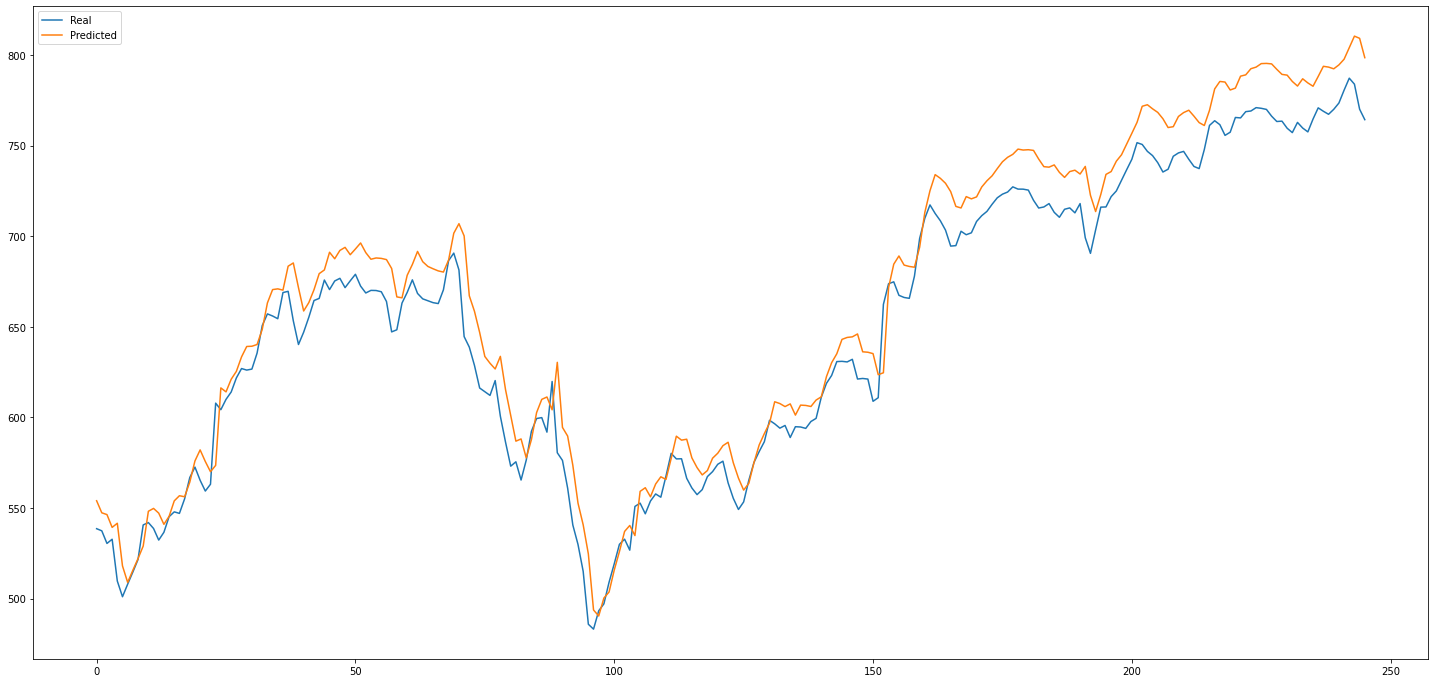

In [ ]:
predicted = model.predict(x_test)
predicted = pd.DataFrame(predicted)
predicted = normalized.inverse_transform(predicted)
predicted = pd.DataFrame(predicted)
y_test = pd.DataFrame(y_test)
y_test = normalized.inverse_transform(y_test)
predictions = pd.DataFrame(y_test, columns=['Real'])
predictions['Predicted'] = pd.DataFrame(predicted)
predictions.plot(figsize=(25,12))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(predicted, y_test)

rmse = np.sqrt(mse)

mae = mean_absolute_error(predicted, y_test)

mape = mean_absolute_percentage_error(predicted, y_test)*100
print("MSE: " + str(mse))
print("RMSE: " + str(rmse))
print("MAE: " + str(mae))
print("MAPE: " + str(mape) + " %")

MSE: 359.8050719221981
RMSE: 18.968528459587954
MAE: 16.265152149811065
MAPE: 2.399006407157792 %


In [ ]:
path = ('/content/drive/MyDrive/Colab Notebooks/AMZN')
tweet_df = []
files = os.listdir(path)
for tweet in files:
  json_file = f'{path}/{tweet}'
  json_file = open(json_file, 'r')
  for line in json_file.readlines():
    tweet_df_date = pd.read_json(line)
    tweet_df.append(tweet_df_date)
tweets_df = pd.concat(tweet_df)
tweets_df.reset_index(drop=True, inplace=True)
tweets_df.head()

In [ ]:
tweets_df.to_pickle("/content/drive/MyDrive/Colab Notebooks/my_data.pkl")

In [ ]:
new_df = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/my_data.pkl")

In [ ]:
new_df.head

In [ ]:
new_df = new_df.reindex(columns=['created_at', 'text'])
new_df = new_df.sort_values(by="created_at")
new_df = new_df.drop_duplicates(subset=['text'])
new_df.head()

In [ ]:
import re
df = pd.DataFrame(new_df)

def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet)
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet
df['text'] = df['text'].map(lambda x: cleaner(x))

In [ ]:
df = df.sort_values(by="created_at")
df.set_index('created_at', inplace=True)
df.head()

In [ ]:
!pip install textblob

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

nltk.downloader.download('vader_lexicon')


df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    df.loc[index, 'sentiment'] = 'negative'
  elif pos > neg:
    df.loc[index, 'sentiment'] = 'positive'
  else:
    df.loc[index, 'sentiment'] = 'neutral'
  df.loc[index, 'neg'] = neg
  df.loc[index, 'neu'] = neu
  df.loc[index, 'pos'] = pos
  df.loc[index, 'compound'] = comp
df.head(10)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
created_at,,,,,,,,
2014-01-01 15:01:12+00:00,Apple Screwed Up Big Time $AMZN $AAPL,0.000000,0.100000,negative,0.348,0.652,0.000,-0.4939
2014-01-02 04:26:15+00:00,RT : Several incredible novels to help you to ...,0.500000,0.450000,positive,0.000,0.824,0.176,0.4574
2014-01-02 14:59:42+00:00,$AMZN is getting on my nerves. so much for tha...,0.200000,0.200000,negative,0.123,0.877,0.000,-0.1027
2014-01-03 09:42:23+00:00,"The first employees at Google, Amazon and Subw...",0.175000,0.316667,positive,0.000,0.794,0.206,0.4404
2014-01-03 21:36:50+00:00,RBC top 3 Internet longs for 2014: $GOOG (best...,0.833333,0.366667,positive,0.000,0.742,0.258,0.6808
2014-01-04 23:25:18+00:00,$AMZN Amazons Bezos rescued by Ecuador Navy du...,-0.125000,0.375000,positive,0.079,0.719,0.201,0.4019
2014-01-05 03:07:18+00:00,$AMZN Amazons Bezos airlifted off Galapagos in...,0.000000,0.000000,negative,0.381,0.619,0.000,-0.5106
2014-01-05 07:31:18+00:00,$AMZN Amazons Bezos rescued by Ecuador Navy du...,-0.125000,0.375000,positive,0.079,0.719,0.201,0.4019
2014-01-05 08:05:11+00:00,Bezos airlifted from cruise after kidney stone...,0.000000,0.000000,negative,0.279,0.721,0.000,-0.4767


In [ ]:
df.to_pickle("/content/drive/MyDrive/Colab Notebooks/my_data_sentiment.pkl")

In [ ]:
amazon_df = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/my_data_sentiment.pkl")

In [ ]:
#converting the categorical sentiment column
def cat_to_num(cat):
    if cat == "negative":
      return 0
    return 1

amazon_df["sentiment"] = amazon_df["sentiment"].apply(cat_to_num)

In [ ]:
MAXLEN = 250
BATCH_SIZE = 64

In [ ]:
x_train = amazon_df["text"]
y_train = amazon_df["sentiment"]

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)


In [ ]:
MAX_WORDS = 5000
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
from keras.preprocessing import sequence

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=MAXLEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAXLEN)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(MAX_WORDS, 32),
                             tf.keras.layers.LSTM(32),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs = 15, validation_split = 0.2)

Epoch 1/15
54/54 [==============================] - 9s 126ms/step - loss: 0.4249 - acc: 0.8599 - val_loss: 0.3702 - val_acc: 0.8864
Epoch 2/15
54/54 [==============================] - 6s 117ms/step - loss: 0.3709 - acc: 0.8646 - val_loss: 0.3268 - val_acc: 0.8864
Epoch 3/15
54/54 [==============================] - 6s 117ms/step - loss: 0.2995 - acc: 0.8749 - val_loss: 0.3098 - val_acc: 0.8993
Epoch 4/15
54/54 [==============================] - 6s 117ms/step - loss: 0.2362 - acc: 0.9027 - val_loss: 0.2678 - val_acc: 0.9087
Epoch 5/15
54/54 [==============================] - 6s 117ms/step - loss: 0.1789 - acc: 0.9367 - val_loss: 0.2609 - val_acc: 0.9028
Epoch 6/15
54/54 [==============================] - 6s 118ms/step - loss: 0.1525 - acc: 0.9519 - val_loss: 0.2633 - val_acc: 0.9133
Epoch 7/15
54/54 [==============================] - 6s 117ms/step - loss: 0.1171 - acc: 0.9654 - val_loss: 0.2740 - val_acc: 0.9028
Epoch 8/15
54/54 [==============================] - 6s 116ms/step - loss: 0.

In [ ]:
predicted = model.predict(x_test)

In [ ]:
predicted

array([[0.9999317 ],
       [0.99997985],
       [0.99991   ],
       ...,
       [0.9999773 ],
       [0.99886656],
       [0.9997868 ]], dtype=float32)

In [ ]:
normalized_pred = []
for predict in predicted:
  if predict >= 0.5:
    normalized_pred.append(1)
  else:
    normalized_pred.append(0)


In [ ]:
normalized_pred

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score


In [ ]:
predicted = pd.DataFrame(normalized_pred)
predicted.head()

,0
0,1
1,1
2,1
3,1
4,1


In [ ]:
prediction = pd.DataFrame()

In [ ]:
prediction['Predicted'] = predicted

In [ ]:
predicted.head

<bound method NDFrame.head of       0
0     1
1     1
2     1
3     1
4     1
...  ..
1062  1
1063  1
1064  1
1065  1
1066  1

[1067 rows x 1 columns]>

In [ ]:
y_test= pd.DataFrame(y_test)
real = pd.DataFrame()
real['Real'] = y_test
real.head()

,Real
created_at,
2015-01-06 18:44:59+00:00,1
2014-04-25 18:04:04+00:00,1
2015-08-01 11:29:43+00:00,1
2014-05-04 15:29:35+00:00,1
2014-04-28 12:38:12+00:00,1


In [ ]:
prediction.head()

,Predicted
0,1
1,1
2,1
3,1
4,1


In [ ]:
precision = precision_score(real['Real'],prediction['Predicted'])
recall = recall_score(real['Real'],prediction['Predicted'])
accuracy = accuracy_score(real['Real'],prediction['Predicted'])

In [ ]:
print(precision, recall, accuracy)

0.9418994413407821 0.9025695931477516 0.865979381443299


In [ ]:
prediction['Predicted'] = prediction['Predicted'].map({1:'POSITIVE', 0:'NEGATIVE'}).astype(str)
real['Real'] = real['Real'].map({1:'POSITIVE', 0:'NEGATIVE'}).astype(str)

In [ ]:
confusion_matr = confusion_matrix(real['Real'],prediction['Predicted'])

In [ ]:
print(confusion_matr)

[[ 81  52]
 [ 91 843]]


In [ ]:
TPR =  round(843/(843+91),2)
print (TPR)

0.9


In [ ]:
FPR = round(52/(52 + 81), 2)
print (FPR)

0.39
